In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import json
#importiamo le librerie che saranno necessarie all'analisi dei dati

import datetime as dtime #per convertire date da interi o object o str a date

In [11]:
dt = pd.read_csv('spoty_v.csv', encoding='latin-1', sep=None, engine='python') #se ci da problemi con l'encoding proviamo utf-8 o 32, poi latin-1 o cp1252 e vedi se legge altrimenti
# controlla se sia file csv in effetti o excel rinominato con with open('','')as file: file.read o print(f.read('numero righe dove troviamo problema encoding')
dt.head()
dt.info()
dt.describe()
dt.isnull().sum() #scopriamo che nelle colonne in shazam chart e key abbiamo 95 e 50 valori NaN
dt.dropna(inplace=True) #ci accertiamo che sia memorizzato
dt.isnull().sum() #controlliamo e infatti 0 valori nulli
dt.duplicated().sum() #controlliamo duplicati
#dt.set_index('track_name',inplace=True)
dt.drop_duplicates(inplace=True) #ora abbiamo effettuato una pulizia completa,passiamo all'analisi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [73]:
dt.head(30)
#dt.set_index('track_name',inplace=True) #settiamo l'indice
#dt['streams']=dt['streams'].astype('int64') #per convertire in numeri o viceversa oggetti ma si evince che il file ha delle str sporche, o elimini o aggiusti dal file
#oppure gli streams sono semplicemente registrati con codici, la nostra era un'ipotesi
dt.info()
dt['media_playlist_apple']=dt[['in_spotify_playlists','in_spotify_charts']].mean(axis=1)
print(dt['media_playlist_apple'].head(10)) #le colonne le chiamiamo con le parentesi quadre, e i comandi aggiuntivi se eseguiti con print sempre racchiusi nelle tonde
dt.min() #con min e max controlliamo valori massimi e minimi per essere sicuri che non ci sballi i grafici
dt.max().info() #rileviamo valori anomali sballati
#dt.drop(25,inplace=True)
dt.max() #però se vogliamo sapere dove si trova questo dato massimo,usiamo .idxmax() per vedere i massimi di ogni riga poi
dt.idxmax() 
#print(dt.loc[574]) #per vedere a riga 574 infatti abbiamo quel valore anomalo di streams , per una pulizia più accurata dobbiamo settare dei valori booleani
#dt.drop(574,inplace=True) # cosi lo eliminiamo
print(574 in dt.index) #abbiamo fatto pulizia , ora controlliamo se ci sono altre anomalie
dt['track_name'].idxmax() #ci restiutisce esattamente la posizione della riga col dato sporco cosi che poi lo andiamo a cancellare
#dt.drop(374,inplace=True) #poi mettiamo asterisco poichè eliminato ovviamente non ritrova 374
print(374 in dt.index)
if 374 in dt.index:
    print("❌ La riga 374 ESISTE ANCORA (probabilmente hai ricaricato i dati).") #usa questo comando per accertarti che sia stata cancellata
    print("Riesegui la cella con dt.drop(374, inplace=True) ORA.")
else:
    print("✅ La riga 374 è stata CANCELLATA correttamente.")
    print("Se vedi un altro numero, è il NUOVO record che ha preso il posto del vecchio.")
dt.drop_duplicates(inplace=True) #lo eseguiamo nuovamente per sicurezza e potremmo farlo anche specifico per subclassi
#con dt.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first', inplace=True)

<class 'pandas.core.frame.DataFrame'>
Index: 814 entries, 0 to 952
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            814 non-null    object 
 1   artist(s)_name        814 non-null    object 
 2   artist_count          814 non-null    int64  
 3   released_year         814 non-null    int64  
 4   released_month        814 non-null    int64  
 5   released_day          814 non-null    int64  
 6   in_spotify_playlists  814 non-null    int64  
 7   in_spotify_charts     814 non-null    int64  
 8   streams               814 non-null    object 
 9   in_apple_playlists    814 non-null    int64  
 10  in_apple_charts       814 non-null    int64  
 11  in_deezer_playlists   814 non-null    object 
 12  in_deezer_charts      814 non-null    int64  
 13  in_shazam_charts      814 non-null    object 
 14  bpm                   814 non-null    int64  
 15  key                   814 no

In [96]:
dt['streams'] = pd.to_numeric(dt['streams'], errors='coerce') #siccome ci dava streams come object lo puliamo con coerce da tutti i non numeri
# prossimo step dopo l'analisi,pulizia,condizioni,verfiche e pulizia duplicati,bisogna ordinare i propri dati
dt.sort_values(by='streams',ascending=True) #cosi in ordine dal più piccolo al più grande
top_10=dt.head(10)
print(top_10) #verifichiamo e scoviamo i 10 brani più ascoltati


                            track_name              artist(s)_name  \
0  Seven (feat. Latto) (Explicit Ver.)            Latto, Jung Kook   
1                                 LALA                 Myke Towers   
2                              vampire              Olivia Rodrigo   
3                         Cruel Summer                Taylor Swift   
4                       WHERE SHE GOES                   Bad Bunny   
5                             Sprinter           Dave, Central Cee   
6                      Ella Baila Sola  Eslabon Armado, Peso Pluma   
7                             Columbia                     Quevedo   
8                             fukumean                       Gunna   
9                      La Bebe - Remix       Peso Pluma, Yng Lvcas   

   artist_count  released_year  released_month  released_day  \
0             2           2023               7            14   
1             1           2023               3            23   
2             1           2023       

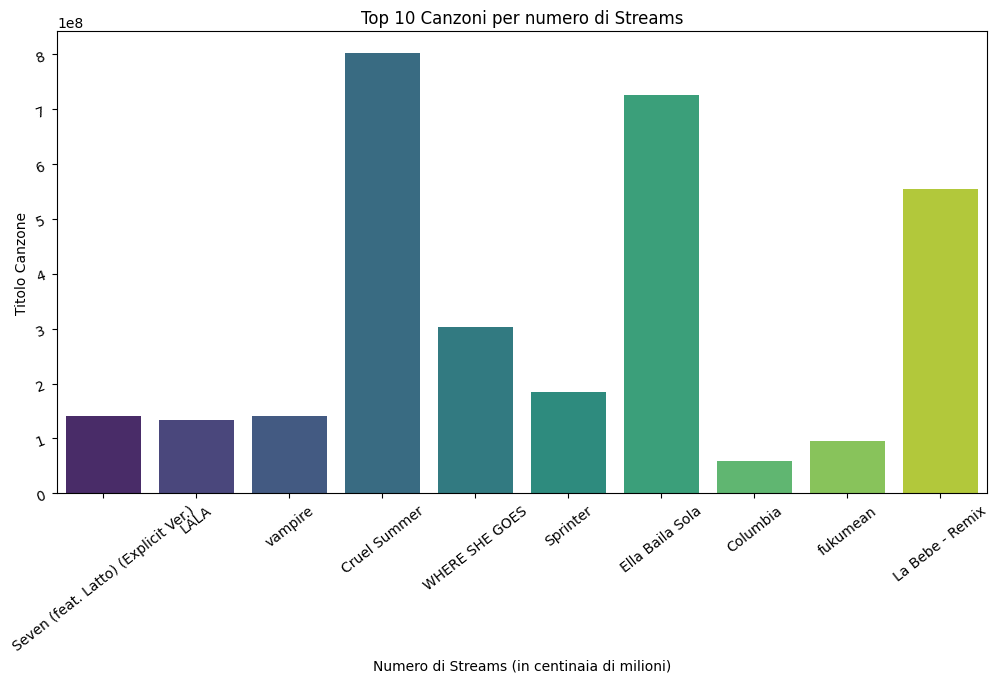

In [101]:
#adesso che abbiamo ordinato e scelto su chi fare l'analisi creiamo i vari grafici con seaborn e matplotlib che sono collegati
plt.figure(figsize=(12,6)) #stabiliamo la size della figura

sns.barplot(data=top_10, x='track_name', y='streams', palette='viridis',hue='track_name',legend=False) #struttura grafico
plt.xticks(rotation=38) #per renderlo leggibile
plt.yticks(rotation=20)
plt.title('Top 10 Canzoni per numero di Streams')
plt.xlabel('Numero di Streams (in centinaia di milioni)')
plt.ylabel('Titolo Canzone') #assegnazione titoli
plt.show()
 #quel le8 significa che matplotlib ha analizzato inteliggentemente i numeri e ridotto a numero singolo per renderlo leggibile
           

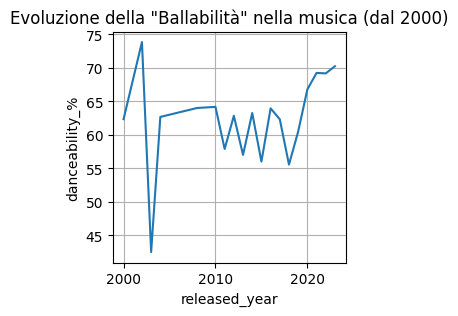

In [108]:
#altro grafico richiesto,analis trend
dt.head(30)
#dt.set_index('track_name',inplace=True) #settiamo l'indice
#dt['streams']=dt['streams'].astype('int64') #per convertire in numeri o viceversa oggetti ma si evince che il file ha delle str sporche, o elimini o aggiusti dal file
#oppure gli streams sono semplicemente registrati con codici, la nostra era un'ipotesi
dt.info()
dt['media_playlist_apple']=dt[['in_spotify_playlists','in_spotify_charts']].mean(axis=1)
print(dt['media_playlist_apple'].head(10)) #le colonne le chiamiamo con le parentesi quadre, e i comandi aggiuntivi se eseguiti con print sempre racchiusi nelle tonde
dt.min() #con min e max controlliamo valori massimi e minimi per essere sicuri che non ci sballi i grafici
dt.max().info() #rileviamo valori anomali sballati
#dt.drop(25,inplace=True)
dt.max() #però se vogliamo sapere dove si trova questo dato massimo,usiamo .idxmax() per vedere i massimi di ogni riga poi
dt.idxmax() 
#print(dt.loc[574]) #per vedere a riga 574 infatti abbiamo quel valore anomalo di streams , per una pulizia più accurata dobbiamo settare dei valori booleani
#dt.drop(574,inplace=True) # cosi lo eliminiamo
print(574 in dt.index) #abbiamo fatto pulizia , ora controlliamo se ci sono altre anomalie
dt['track_name'].idxmax() #ci restiutisce esattamente la posizione della riga col dato sporco cosi che poi lo andiamo a cancellare
#dt.drop(374,inplace=True) #poi mettiamo asterisco poichè eliminato ovviamente non ritrova 374
print(374 in dt.index)
dt.drop_duplicates(inplace=True) #lo eseguiamo nuovamente per sicurezza e potremmo farlo anche specifico per subclassi
#con dt.drop_duplicates(subset=['track_name', 'artist(s)_name'], keep='first', inplace=True)
# 1 Una volta puliti i dati analizziamo i dati: Media della "Danceability" per Anno
trend_dance = dt.groupby('released_year')['danceability_%'].mean().reset_index() #con groupby raggruppi determinate colonne e poi facciamo la media
# Filtriamo per vedere meglio (es. solo dal 2000 in poi)
trend_dance = trend_dance[trend_dance['released_year'] >= 2000]#settiamo da quale anno vogliamo vedere
# 2 Sviluppiamo Il Grafico
plt.figure(figsize=(3, 3))
sns.lineplot(data=trend_dance, x='released_year', y='danceability_%')

plt.title('Evoluzione della "Ballabilità" nella musica (dal 2000)')
plt.grid(True) # Aggiunge la griglia di sfondo (molto usata nei line chart)
plt.show()

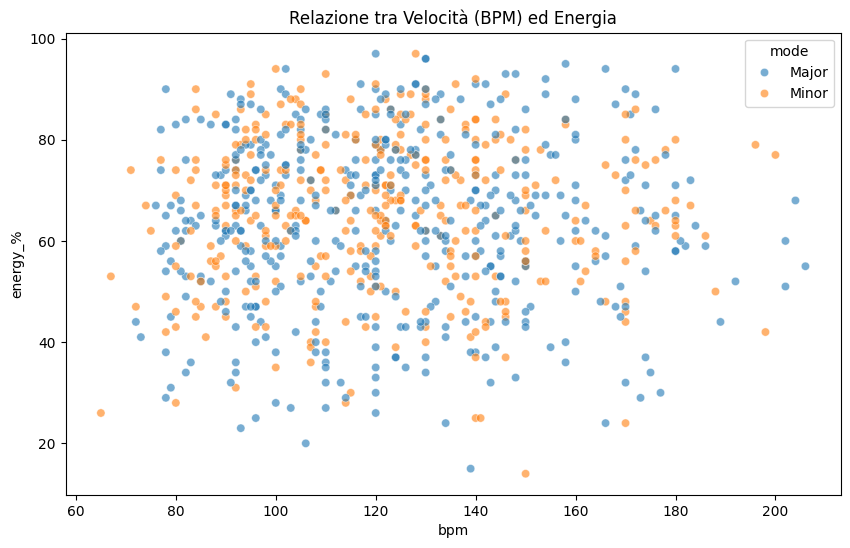

In [104]:
#altro grafico è lo scatterplot ,vede che relazione vi è tra due valori
plt.figure(figsize=(10, 6))

# Confrontiamo BPM (Asse X) con Energy (Asse Y)
# hue='mode' colora i punti diversamente se la canzone è in tonalità Maggiore o Minore
sns.scatterplot(data=dt, x='bpm', y='energy_%', hue='mode', alpha=0.6)

plt.title('Relazione tra Velocità (BPM) ed Energia')
plt.show()

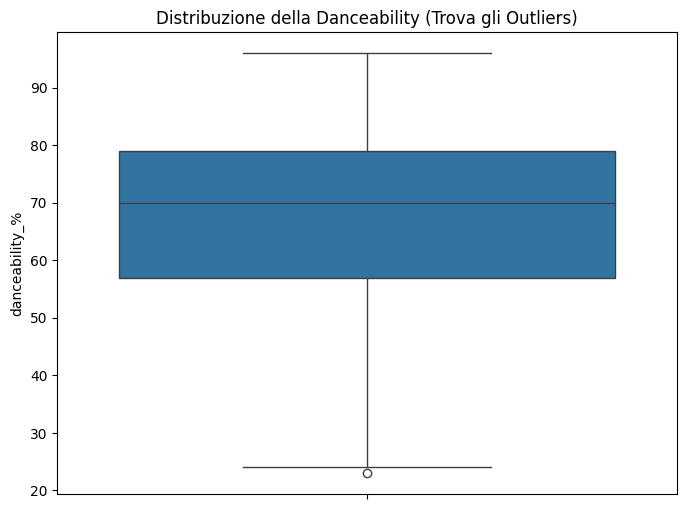

In [105]:
#poi il boxplot che rileva anomalie 
plt.figure(figsize=(8, 6))

# Disegniamo la distribuzione della "Danceability"
sns.boxplot(y=dt['danceability_%'])

plt.title('Distribuzione della Danceability (Trova gli Outliers)')
plt.show() #come mostrato in grafico la maggiorparte si concentra la dove è la scatola,il resto che sta fuori ci mostra anomalie

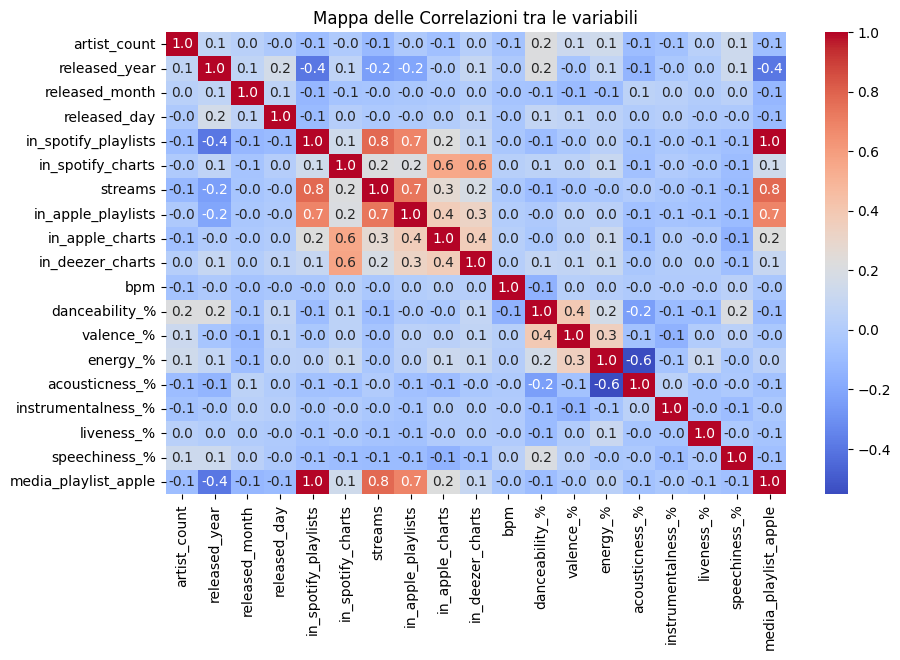

In [113]:
#la heatmap
# 1. Calcoliamo la matrice di correlazione (solo colonne numeriche)
# Selezioniamo solo colonne numeriche per evitare errori
colonne_numeriche = dt.select_dtypes(include=['float64', 'int64']) #ovviamente isoli solo i tipi numerici
correlazione = colonne_numeriche.corr()

# 2. Disegniamo la Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlazione, annot=True, cmap='coolwarm', fmt=".1f")
plt.title('Mappa delle Correlazioni tra le variabili')
plt.show()